In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


# Get The Dataset
Dataset di download dari repository Google.
- Variabel `train_images` merupakan numpy array yang menyimpan data latih. Data latih terdiri dari 60,000 citra hitam putih berukuran 28x28.
- Variabel `test_images` merupakan numpy array yang menyimpan data uji. Data uji terdiri dari 10,000 citra hitam putih berukuran 28x28.


In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
print(type(train_images))
print(train_images.shape)
print(train_labels.shape)

print(type(test_images))
print(test_images.shape)
print(test_labels.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
<class 'numpy.ndarray'>
(10000, 28, 28)
(10000,)


# Lihat Dataset
program di bawah menampilkan dataset pertama (`train_images[0]`). Tampak data citra memiliki nilai pada rentangan antara 0-255.

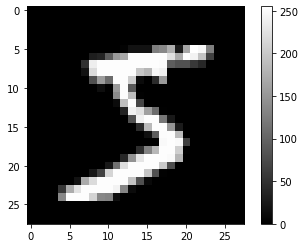

Label: 5


In [4]:
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.show()

print("Label:",train_labels[0])

# Membuat model Jaringan Saraf Tiruan

Model JST yang dibuat menggunakan framework keras dengan spesifikasi:
- 1 buah hidden layer dengan 128 neuron
- neuron menggunakan fungsi aktivasi ReLU

In [5]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Mulai Pelatihan

In [7]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 1.5097 - acc: 0.8009
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4047 - acc: 0.8948
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3073 - acc: 0.9154
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2631 - acc: 0.9268
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2346 - acc: 0.9347
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2136 - acc: 0.9403
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2000 - acc: 0.9433
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1856 - acc: 0.9467
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1760 - acc: 0.9498
Epoch 10/10
60000/60000 [==============================] - 

# Prediksi Kelas Data Test

In [8]:
classes = model.predict_classes(test_images)

# Hitung akurasi = total kelas yang benar / total kelas keseluruhan * 100%
accuration = np.sum(classes == test_labels)/len(test_labels) * 100

print("Test Accuration : " + str(accuration) + '%')
print("Prediction :")
print(classes)
print("Label Harusnya :")
print(np.asarray(test_labels))

Test Accuration : 94.35%
Prediction :
[7 2 1 ... 4 5 6]
Label Harusnya :
[7 2 1 ... 4 5 6]
